In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Задание 1

[Решение](hw_task_2.pdf)

$ N = 90$

In [3]:
# та же функция
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2; 

In [4]:
def diff_n(t, p, n):
    return (p[n:] - p[:-n]) / (t[n:] - t[:-n])

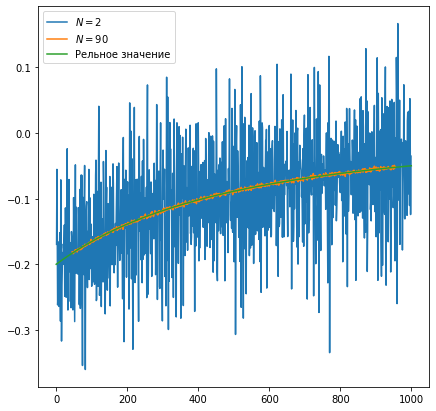

In [19]:
plt.figure(figsize=(7, 7))
N = 2
plt.plot(t[N//2:-N//2], diff_n(t, p,  N), label="$N = 2$")
N = 90
plt.plot(t[N//2:-N//2], diff_n(t, p,  N), label="$N = 90$")

plt.plot(t, pprime, label="Рельное значение")

plt.legend()
plt.show()

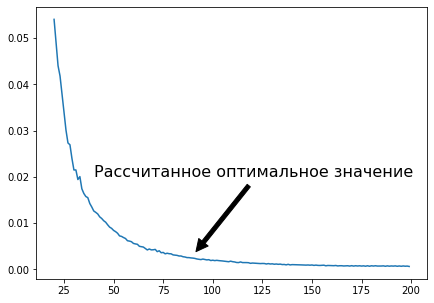

In [42]:
# вычислим среднеквадратичную ошибку
plt.figure(figsize=(7, 5))

begin = 20 # начальное N
end = 200 # конечное N

msq = np.zeros(end)
for i in range(begin, end):
  # print(i, diff_n(t, p, i).size, pprime[i//2:-i//2].size)
  msq[i] = np.sum((diff_n(t, p, i) - pprime[i//2:-i//2]) ** 2)


plt.plot(np.arange(begin, end), msq[begin:])
plt.annotate("Рассчитанное оптимальное значение", (90, 3e-3), xytext=(40, 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

plt.show()

# Задание 2

In [43]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

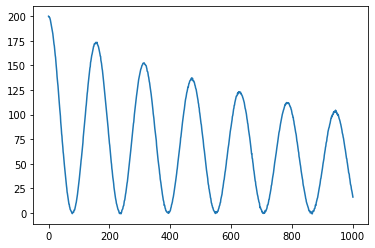

In [44]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)

In [53]:
Usmooth = UnivariateSpline(t, u, s=100)

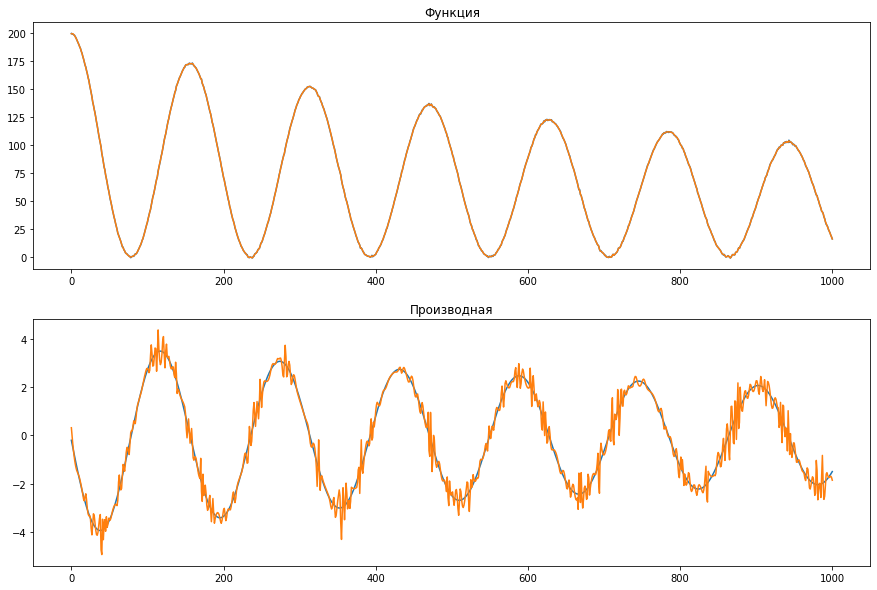

In [54]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("Функция")
plt.plot(t, u)
plt.plot(t, Usmooth(t))

plt.subplot(212)
plt.title("Производная")
plt.plot(t, uprime)
plt.plot(t, Usmooth.derivative()(t))

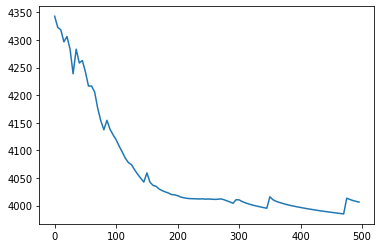

In [61]:
# вычислим ошибку производной при различных значениях s

n = 100
step = 5
errors = np.zeros(n)

for i in range(0, n):
    u_smooth = UnivariateSpline(t, u, s=i*step)
    errors[i] = np.sum((u_smooth.derivative()(t) - pprime) ** 2)

plt.plot(np.arange(0, n) * step, errors)


По графику видим, что после $s = 200$ особых улучшений не видно

# Задание 3

[Решение](hw_task_3.pdf)

$h^* \approx \frac{3}{2} \sqrt[5]{\frac{\Delta f}{M_5}}$

# Задание 4

# Задание 5, 6

[решение](hw_1_2_3.pdf)